<a href="https://colab.research.google.com/github/Pila1488/-_DDDC/blob/main/model_DDDC_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anujms/car-damage-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/car-damage-detection


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os


In [ ]:
data_dir = "/kaggle/input/car-damage-detection/data1a/training"
data_dir1 = "/kaggle/input/car-damage-detection/data1a/validation"
image_paths = []
labels = []
X = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, img_name))
        labels.append(class_name)

for img_path in image_paths:
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img)
    X.append(img_array)
X = np.array(X)
x_train, x_test, y_train, y_test = train_test_split(
    X, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

In [ ]:
for e in range(len(y_test)):
  if y_test[e] == "00-damage":
    y_test[e] = 0
  else:
    y_test[e] = 1
for e in range(len(y_train)):
  if y_train[e] == "00-damage":
    y_train[e] = 0
  else:
    y_train[e] = 1

y_train_cat = to_categorical(y_train, 2)
y_test_cat  = to_categorical(y_test, 2)

In [ ]:

model = Sequential([

    Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [ ]:

model.fit(
    x_train, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 883ms/step - accuracy: 0.4877 - loss: 1.3660 - val_accuracy: 0.6824 - val_loss: 0.6605
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 962ms/step - accuracy: 0.6493 - loss: 0.6440 - val_accuracy: 0.6959 - val_loss: 0.5738
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 868ms/step - accuracy: 0.6996 - loss: 0.5832 - val_accuracy: 0.8041 - val_loss: 0.5217
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 902ms/step - accuracy: 0.7486 - loss: 0.5326 - val_accuracy: 0.7703 - val_loss: 0.5098
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 870ms/step - accuracy: 0.7783 - loss: 0.4796 - val_accuracy: 0.8041 - val_loss: 0.4307
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 871ms/step - accuracy: 0.8072 - loss: 0.4097 - val_accuracy: 0.8243 - val_loss: 0.4120
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 860ms/step - accuracy: 0.8751 - loss: 0.3428 - val_accuracy: 0.8176 - val_loss: 0.4194
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8940 - loss: 0.2789 - val_accurac

In [ ]:
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Точность: {acc}")

Точность: 0.760869562625885


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


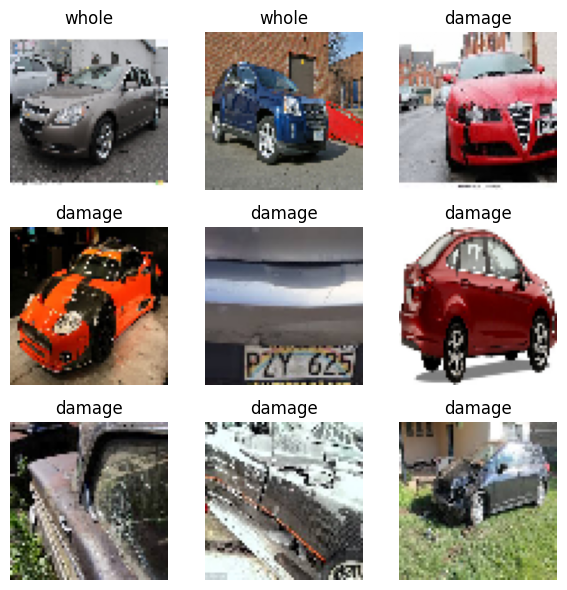

In [ ]:
lbls = ['damage', 'whole']
examples = x_test[:10]
predictions = model.predict(examples)
preds = predictions.argmax(axis=1)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(examples[i])
    plt.title(lbls[preds[i]])

    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model.save('model_cnn_DD.h5')

In [ ]:
import os
from tensorflow.keras.models import load_model
model = load_model('model_cnn_DD.h5')

In [ ]:
from google.colab import files
up = files.upload()

Saving machine.jpg to machine.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Машина повреждена


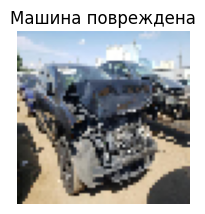

In [ ]:
import cv2
import numpy as np

img = cv2.imread('machine.jpg')
img = cv2.resize(img, (64,64))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = img
img = img.astype('float32')/255.0
img = np.expand_dims(img, axis=0)
lbls1 = ['Машина повреждена', 'Машина целая']
pred_index = model.predict(img).argmax(axis=1)[0]
pred_label = lbls1[pred_index]
print(pred_label)
plt.figure(figsize=(6,6))

plt.subplot(3,3,1)
plt.imshow(img1)
plt.title(lbls1[pred_index])
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:


path = kagglehub.dataset_download("sharko294/image-dataset-for-car-damage-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/image-dataset-for-car-damage-classification


In [ ]:
import os
import pandas as pd

data_dir = "/kaggle/input/image-dataset-for-car-damage-classification"
train_csv = os.path.join(data_dir, "train", "train.csv")
images_dir = os.path.join(data_dir, "train", "images")

df = pd.read_csv(train_csv)
df.head()

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5


In [ ]:
x_train = []
y_train = []
from tqdm import tqdm
import cv2
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(images_dir, row['filename'])
    img = cv2.imread(img_path)
    if img is None:

        continue

    img = cv2.resize(img, (64, 64))
    x_train.append(img)
    y_train.append(int(row['label']))
x_train = np.array(x_train)
y_train = np.array(y_train)



100%|██████████| 7200/7200 [00:54<00:00, 132.97it/s]


In [ ]:
y_train

array([2, 4, 2, ..., 4, 2, 2])

In [ ]:
x_train = x_train.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 7)


In [ ]:
print(np.unique(y_train))

[1 2 3 4 5 6]


In [ ]:
model = Sequential([

    Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [ ]:
model.fit(
    x_train, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 93s 895ms/step - accuracy: 0.3025 - loss: 1.6464 - val_accuracy: 0.3403 - val_loss: 1.5534
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 138s 864ms/step - accuracy: 0.3200 - loss: 1.5772 - val_accuracy: 0.3431 - val_loss: 1.5334
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 143s 870ms/step - accuracy: 0.3304 - loss: 1.5402 - val_accuracy: 0.3472 - val_loss: 1.4549
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 143s 884ms/step - accuracy: 0.3689 - loss: 1.4658 - val_accuracy: 0.3861 - val_loss: 1.4296
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 882ms/step - accuracy: 0.3853 - loss: 1.4425 - val_accuracy: 0.3764 - val_loss: 1.4170
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 143s 889ms/step - accuracy: 0.4110 - loss: 1.4036 - val_accuracy: 0.4014 - val_loss: 1.3922
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 141s 883ms/step - accuracy: 0.4099 - loss: 1.4013 - val_accuracy: 0.3917 - val_loss: 1.3961
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 886ms/step - accuracy: 0.4270 - 

In [ ]:
loss, acc = model.evaluate(x_train, y_train_cat, verbose=0)
print(f"Точность: {acc}")

Точность: 0.8436111211776733


In [ ]:
model.save('model_cnn_DC.h5')


In [ ]:
from google.colab import files
from tensorflow.keras.models import Model, load_model
model = load_model('model_cnn_DC.h5')
up = files.upload()

Saving machine1.jpg to machine1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Найдена вмятина


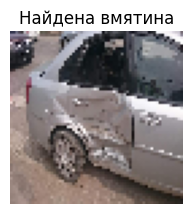

In [ ]:
import cv2
import numpy as np

img = cv2.imread('machine1.jpg')
img = cv2.resize(img, (64,64))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = img
img = img.astype('float32')/255.0
img = np.expand_dims(img, axis=0)
lbls1 = ['','Найдена трещина','Найдена царапина','Найдено спущенное колесо','Найдена вмятина','Найдено разбитое стекло', 'Найдены разбитые фары']

pred_index = model.predict(img).argmax(axis=1)[0]
pred_label = lbls1[pred_index]
print(pred_label)
plt.figure(figsize=(6,6))
plt.subplot(3,3,1)
plt.imshow(img1)
plt.title(pred_label)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Concatenate
import tensorflow as tf
import os
def rebuild_model(model, new_name_prefix):
    new_input = Input(shape=model.input_shape[1:], name=f'{new_name_prefix}_input')
    x = new_input

    for i, layer in enumerate(model.layers):

        config = layer.get_config()
        config['name'] = f'{new_name_prefix}_{layer.name}_{i}'

        new_layer = layer.__class__.from_config(config)
        if layer.weights:
            new_layer.build(x.shape)
            new_layer.set_weights(layer.get_weights())

        x = new_layer(x)

    return Model(inputs=new_input, outputs=x, name=f'{new_name_prefix}_model')


modelDD = load_model('model_cnn_DD.h5')
modelDC = load_model('model_cnn_DC.h5')

modelDD = rebuild_model(modelDD, 'dd')
modelDC = rebuild_model(modelDC, 'dc')

In [ ]:
input_layer = Input(shape=(64,64,3), name='main_input')


In [ ]:

outputDD = modelDD(input_layer)
outputDC = modelDC(input_layer)
merged = Concatenate(name='final_merge')([outputDD, outputDC])

combined_model = Model(
    inputs=input_layer,
    outputs=merged,
    name='combined_DD_DC'
)




combined_model.save('model_DDDC.h5')

In [ ]:
from tensorflow.keras.models import Model, load_model

import tensorflow as tf
import os
model = load_model('/content/model_DDDC.h5')
from google.colab import files
upl = files.upload()

Saving machine8.webp to machine8.webp


In [ ]:
import cv2
import numpy as np
filename = next(iter(upl))
img = cv2.imread(filename)
img = cv2.resize(img, (64,64))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = img
img = img.astype('float32')/255.0
img = np.expand_dims(img, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Машина повреждена
Найдены разбитые фары


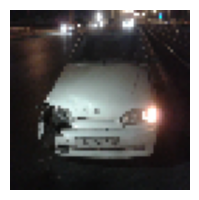

In [ ]:
import matplotlib.pyplot as plt


predictions = model.predict(img)
predictions
dd = predictions[0, :2].argmax(axis=0)
dc = predictions[0, 2:].argmax(axis=0)
lbls = ['Машина повреждена', 'Машина целая']
lbls1 = ['','Найдены трещины','Найдены царапины','Найдено спущенное колесо','Найдены вмятины','Найдено разбитое стекло', 'Найдены разбитые фары']

print(lbls[dd])
if dd == 0:
  print(lbls1[dc])
plt.figure(figsize=(6,6))

plt.subplot(3,3,1)
plt.imshow(img1)
plt.axis('off')
plt.tight_layout()
plt.show()